# 오차역전파법

덧셈 노드 & 곱셈 노드 구현하기

In [10]:
# 곱셈 계층 구현

class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None
    
    def forward(self, x, y):
        self.x = x
        self.y = y
        out = x*y

        return out
    
    def backward(self, dout):
        dx = dout * self.y
        dy = dout * self.x

        return dx, dy

In [11]:
import sys, os
sys.path.append(os.pardir)

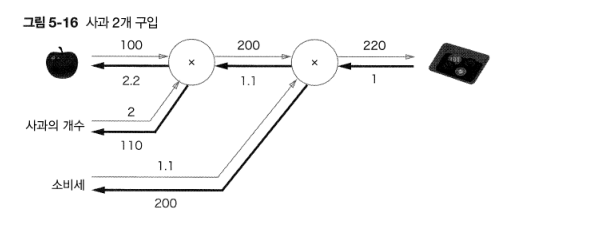

In [12]:
from IPython.display import Image
Image('./sample1.PNG')

In [13]:
# 순전파
apple = 100
apple_num = 2
tax = 1.1

mul_apple_layer = MulLayer()
mul_tax_layer   = MulLayer()

apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)

print('price:', round(price,2))

price: 220.0


In [14]:
# 역전파
dprice = 1
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print('dapple:', dapple, 'dapple_num:', round(dapple_num,2), 'dtax:', dtax)

dapple: 2.2 dapple_num: 110.0 dtax: 200


In [15]:
# 덧셈 계층 구현
class AddLayer:
    def __init__(self):
        pass
    
    def forward(self, x, y):
        out = x + y

        return out
    
    def backward(self, dout):
        dx = dout * 1
        dy = dout * 1

        return dx, dy

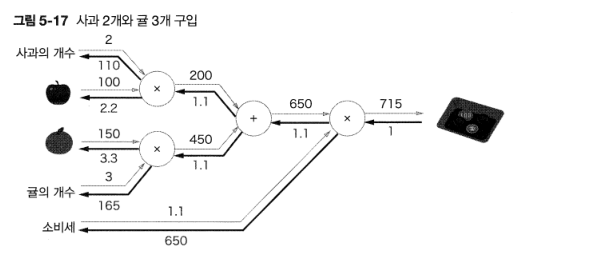

In [17]:
Image('./sample2.PNG')

In [18]:
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
mul_tax_layer = MulLayer()
add_apple_orange_layer = AddLayer()

In [19]:
# 순전파
apple_price = mul_apple_layer.forward(apple, apple_num)
orange_price = mul_orange_layer.forward(orange, orange_num)
all_price = add_apple_orange_layer.forward(apple_price, orange_price)
price = mul_tax_layer.forward(all_price, tax)

print('price:', round(price,2))

price: 715.0


In [20]:
# 역전파
dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice)
dapple_price, dorange_price = add_apple_orange_layer.backward(dall_price)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)
dorange, dorange_num = mul_orange_layer.backward(dorange_price)

print('dapple:',dapple,'dapple_num:', round(dapple_num,2), 'dorange:', round(dorange,2), 'dorange_num:', dorange_num, 'dtax:', dtax)

dapple: 2.2 dapple_num: 110.0 dorange: 3.3 dorange_num: 165.0 dtax: 650


# 활성화 함수 계층 구현

In [21]:
class Relu:
    def __init__(self):
        self.mask = None

    def forward(self, x):
        self.mask = ( x <= 0 )
        out = x.copy()
        out[self.mask] = 0

        return out

    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout
        
        return dx

In [23]:
import numpy as np
x = np.array([[1, -1],[-1, 1]])
x

array([[ 1, -1],
       [-1,  1]])

In [24]:
mask = ( x <= 0)
mask

array([[False,  True],
       [ True, False]])

In [25]:
out = x.copy()

In [26]:
out[mask] = 0
out

array([[1, 0],
       [0, 1]])

# Sigmoid 역전파 구현하기

In [1]:
class Sigmoid:
    def __init__(self):
        self.out = None

    def forward(self, x):
        out = 1/ (1+np.exp(-x))
        self.out = out

        return out
    
    def backward(self, dout):
        dx = dout * (1.0 -self.out) *self.out

        return dx

# Affine/Softmax 계층 구현하기

## 배치용 Affine 계층만들기

In [2]:
class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.x = None
        self.dW = None
        self.db = None
    
    def forward(self, x):
        self.x = x
        out = np.dot(x, self.W) + self.b

        return out

    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)


## Softmax-with-loss 계층

In [ ]:
class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None
        self.y = None
        self.t = None
    
    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)

        return self.loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        dx = (self.y - self.t) / batch_size

        return dx